In [1]:
import seaborn as sns;sns.set(style="ticks", color_codes=True)
import umap.umap_ as umap
%matplotlib inline
%run scripts.py
from sklearn import preprocessing
from matplotlib.lines import Line2D
import numba

# redefining groups
* Hot Jupiters: $P < 10$ d, $ R > 0.8 R_J$

* Long period Giants: $R > 0.8 R_J$, $P>100$d

* sub-Neptunes from $R \in [2.5,3.8] R_{Earth}$

* Rocky planets: $1.5 < R/R_{Earth}$, $P<100$d

* sub Jupiters $R \in [3.8,9] R_{Earth}$,

 Mp, Rp, P, M*, R*, T*
 
Extra quantities calculated: planetary density and stellar luminosity

For the UMAP we're using the log of every parameter-


# UMAP trial 2 - Dimension Reduction


In [84]:
cat_eu="/home/bolacha/University/Project/code/data-example/exoplanet.eu_catalog.csv"
params1 = ['mass','radius', 'orbital_period' , 'star_teff', 'star_mass', 'star_radius']
params2 = ['mass','radius', 'orbital_period' , 'star_teff', 'star_mass', 'star_radius']
df_eu = pd.read_csv(cat_eu, index_col=0)
df_eu = df_eu[params1]
df_eu['luminosity'] = df_eu.star_radius**2*(df_eu.star_teff/5778)**4
df_eu['density'] = df_eu.mass * jupiterMass.to('gram')/((4/3) * np.pi * (df_eu.radius * jupiterRad.to('centimeter'))**3) 
df_eu.mass = df_eu.mass * jupiterMass.to(earthMass)
df_eu.radius = df_eu.radius * jupiterRad.to(earthRad)
df_eu = pd.DataFrame.dropna(df_eu,axis=0, how='any')

df_eu=df_eu[(df_eu.density<=20)]  #density cut to "upper mass limit" planets
df_eu[params2] = np.log10(df_eu[params2])

df_eu

,mass,radius,orbital_period,star_teff,star_mass,star_radius,luminosity,density
# name,,,,,,,,
2M 2206-20 b,3.979314,1.163509,3.938820,3.371068,-0.886057,-0.958607,0.000331,16.933821
51 Peg b,2.174291,1.328320,0.626422,3.762904,0.045323,0.102434,1.619464,0.084977
55 Cnc e,0.934039,0.289366,-0.132799,3.715669,0.006466,-0.008774,0.628085,6.396028
BD+20 594 b,1.212310,0.348419,1.619985,3.760875,-0.017277,-0.032452,0.854052,8.072757
CoRoT-1 b,2.515030,1.222752,0.178676,3.799203,-0.022276,0.045323,1.739188,0.386138
...,...,...,...,...,...,...,...,...
XO-6 b,2.780946,1.365536,0.575765,3.827369,0.167317,0.285557,6.815246,0.265648
XO-7 b,2.352839,1.187237,0.456995,3.795880,0.147676,0.170262,2.998702,0.339702
kappa And b,3.616136,1.128747,5.332438,4.055417,0.447158,0.359835,78.383934,9.329608


In [85]:
solar=sol_pd2(cat_solar,params1)
solar['luminosity'] = solar.star_radius**2*(solar.star_teff/5778)**4
solar['density'] = solar.mass * jupiterMass.to('gram')/((4/3) * np.pi * (solar.radius * jupiterRad.to('centimeter'))**3) 
solar.mass = solar.mass * jupiterMass.to(earthMass)
solar.radius = solar.radius * jupiterRad.to(earthRad)
solar[params2] = np.log10(solar[params2])
solar

Planet,mass,radius,orbital_period,star_teff,star_mass,star_radius,luminosity,density
MERCURY,-1.257275,-0.416801,1.944607,3.761778,0.0,0.0,1.0,5.408767
VENUS,-0.088842,-0.022734,2.351465,3.761778,0.0,0.0,1.0,5.239965
EARTH,0.000000,0.000000,2.562590,3.761778,0.0,0.0,1.0,5.495022
MOON,-1.910095,-0.564793,1.436492,3.761778,0.0,0.0,1.0,3.343900
MARS,-0.970616,-0.274088,2.836748,3.761778,0.0,0.0,1.0,3.904975
JUPITER,2.502154,1.049606,3.638137,3.761778,0.0,0.0,1.0,1.239671
SATURN,1.978637,0.975432,4.030938,3.761778,0.0,0.0,1.0,0.619885
URANUS,1.161368,0.603144,4.485316,3.761778,0.0,0.0,1.0,1.235675
NEPTUNE,1.232996,0.588832,4.776639,3.761778,0.0,0.0,1.0,1.608683
PLUTO,-2.602060,-0.730487,4.956867,3.761778,0.0,0.0,1.0,2.134866


In [86]:
data_EU = pd.concat([df_eu,solar])
data_EU

Planet,mass,radius,orbital_period,star_teff,star_mass,star_radius,luminosity,density
2M 2206-20 b,3.979314,1.163509,3.938820,3.371068,-0.886057,-0.958607,0.000331,16.933821
51 Peg b,2.174291,1.328320,0.626422,3.762904,0.045323,0.102434,1.619464,0.084977
55 Cnc e,0.934039,0.289366,-0.132799,3.715669,0.006466,-0.008774,0.628085,6.396028
BD+20 594 b,1.212310,0.348419,1.619985,3.760875,-0.017277,-0.032452,0.854052,8.072757
CoRoT-1 b,2.515030,1.222752,0.178676,3.799203,-0.022276,0.045323,1.739188,0.386138
...,...,...,...,...,...,...,...,...
JUPITER,2.502154,1.049606,3.638137,3.761778,0.000000,0.000000,1.000000,1.239671
SATURN,1.978637,0.975432,4.030938,3.761778,0.000000,0.000000,1.000000,0.619885
URANUS,1.161368,0.603144,4.485316,3.761778,0.000000,0.000000,1.000000,1.235675
NEPTUNE,1.232996,0.588832,4.776639,3.761778,0.000000,0.000000,1.000000,1.608683


In [87]:
data=data_EU.reset_index()
data['number']=np.ones(len(data),int)

e_gts = data[(data.radius>=np.log10(9))&(data.orbital_period>=np.log10(30))]
hotjups = data[(data.radius>=np.log10(9))&(data.orbital_period<=1.1)]
#dense = data[(data.density>=8)]
sub_nep = data[(data.radius>np.log10(2))&(data.radius<=np.log10(4))]
sub_jups = data[(data.radius<np.log10(8))&(data.radius>=np.log10(4))]
rocky = data[(data.radius<np.log10(2))]

group_names = ['L. Period Giants','Hot Jupiters','sub-Neptunes','sub-Jupiters','Rocky Planets']
names = [e_gts, hotjups, sub_nep, sub_jups, rocky]

print("Total planets", len(data), "Total labeled",len(pd.concat(names)))
for i,n in enumerate(names):
    print(group_names[i],len(n))

Total planets 769 Total labeled 736
L. Period Giants 24
Hot Jupiters 419
sub-Neptunes 138
sub-Jupiters 51
Rocky Planets 104


In [88]:
for i in range(5):
    names[i].number*=i
data_labeled=pd.concat(names)

name_tags = []
for i,l in enumerate(data_labeled.number):
    name_tags = np.append(name_tags, group_names[l])
data_labeled['tag']=name_tags

/usr/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In order to visualize data, we plot a pairplot, showing the relationships between every 2 variables. The diagonals represent density distributions for each parameter

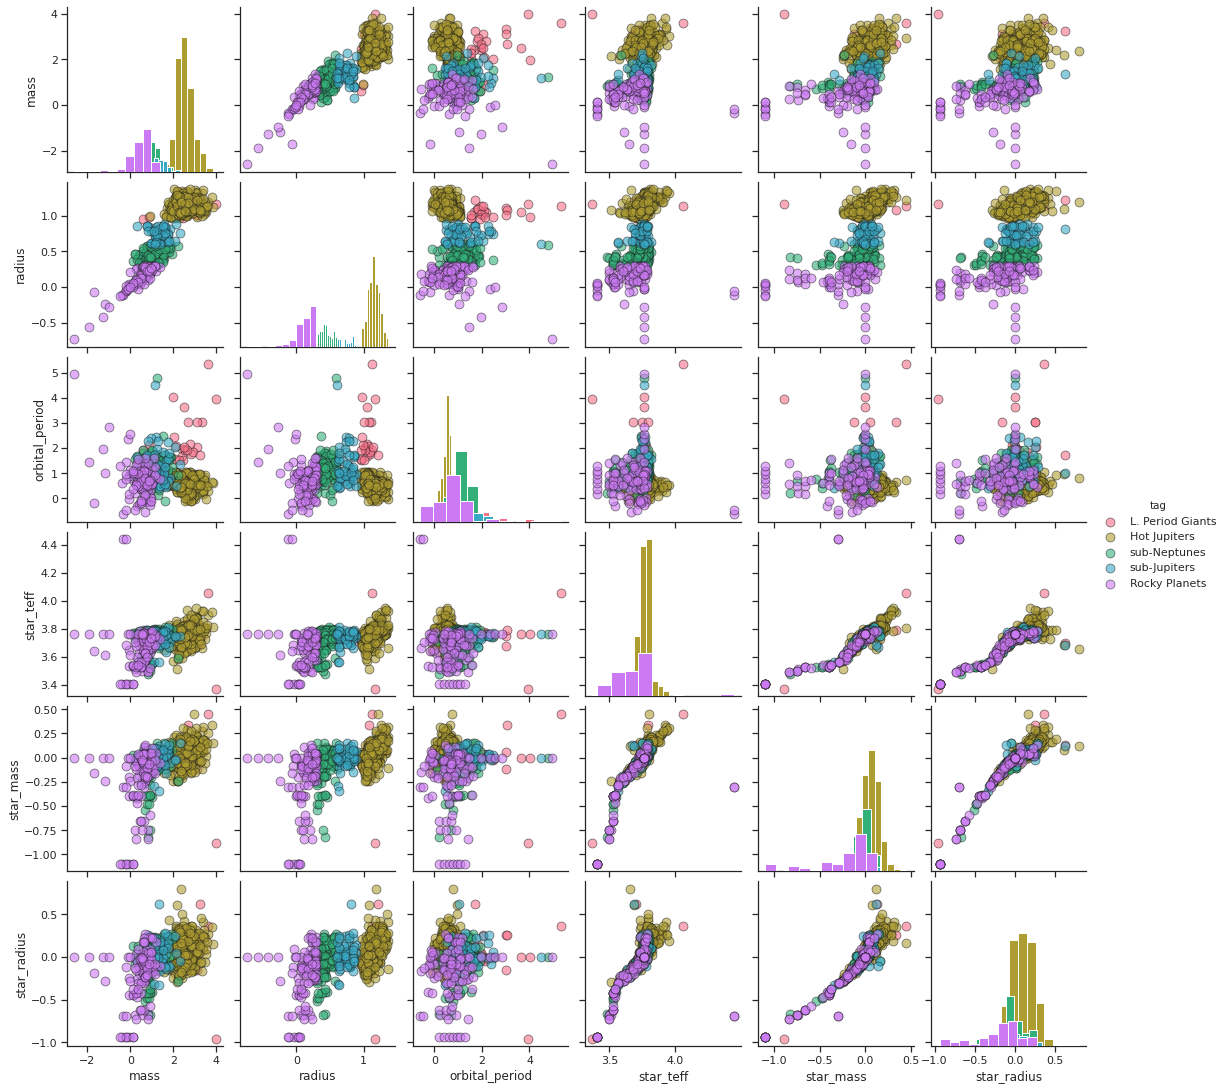

In [70]:
sns.pairplot(data_labeled, vars = params1, hue='tag', diag_kind='hist',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             palette="husl")
plt.savefig("ppt-color.pdf",dpi=1000,bbox_inches='tight')

In [7]:
data_EU2 = data_EU[params2]
x = data_EU2.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_US_scaled = pd.DataFrame(x_scaled)

In [64]:
reducer = umap.UMAP(n_neighbors=80, min_dist=0.05, metric='euclidean')
embedding_scaled = reducer.fit_transform(data_US_scaled)
embedding_scaled.shape

(769, 2)

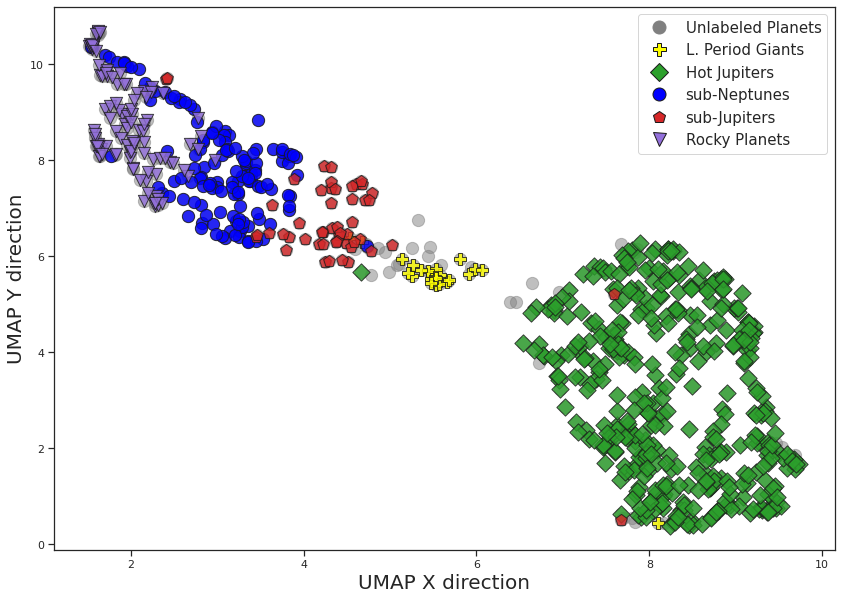

In [71]:
color = ['yellow','tab:green','blue','tab:red','mediumpurple','tab:red']
marker = ['P','D','o','p','v','X']
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding_scaled.T, s=150, c='grey',marker='o', alpha=0.5)

legend_elements = [Line2D([0], [0], c='grey',marker='o',lw=0,label='Unlabeled Planets',markersize=13)]
for i in range(5):
    legend_elements = np.append(legend_elements, Line2D([0], [0],lw=0,c=color[i],marker=marker[i],mec='k',markersize=13))
    group=names[i]
    plt.scatter(*embedding_scaled[np.array(group.index)].T,s=150,c=color[i],marker=marker[i],edgecolor='k',cmap='viridis',alpha=0.8)
plt.ylabel('UMAP Y direction',fontsize=20)
plt.xlabel('UMAP X direction',fontsize=20)
plt.legend(legend_elements, np.append(['Unlabeled Planets'],group_names), loc='best',fontsize=15)
#plt.xticks([])
#plt.yticks([])
#plt.xlim(7.6,7.7)
plt.savefig("6p.pdf",dpi=1000,bbox_inches='tight')
plt.show()

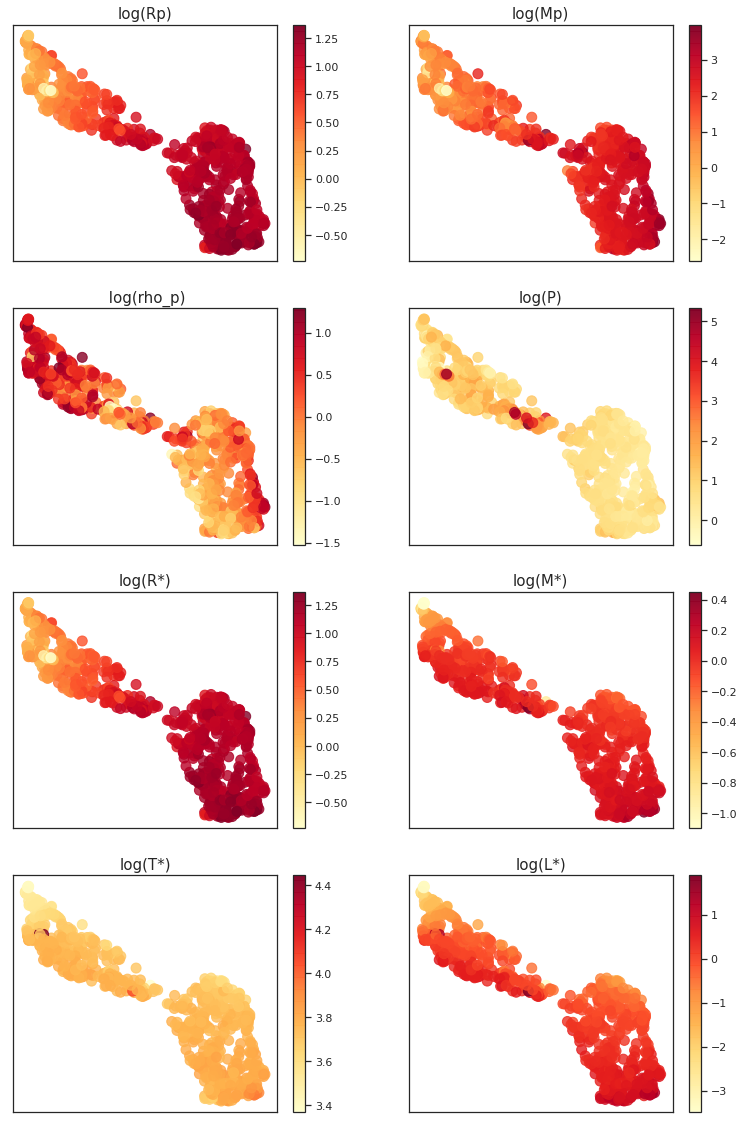

In [75]:
cols=[data_EU.radius, np.log10(data_EU.density),data_EU.radius,data_EU.star_teff]
col_name = ['log(Rp)',' log(rho_p)', 'log(R*)', 'log(T*)']
cols2=[data_EU.mass, data_EU.orbital_period, data_EU.star_mass, np.log10(data_EU.luminosity)]
col_name2 = ['log(Mp)', 'log(P)', 'log(M*)','log(L*)']
fig, ax = plt.subplots(4,2, figsize=(13, 20))
for i, col in enumerate(cols):
    plot1 = ax[i,0].scatter(*embedding_scaled.T, s=100, c=col, cmap='YlOrRd', alpha=0.8)
    ax[i,0].set_title(col_name[i],fontsize=15)
    plt.setp(ax, xticks=[], yticks=[])
    cbar = fig.colorbar(plot1,ax=ax[i,0])
    plot2 = ax[i,1].scatter(*embedding_scaled.T, s=100, c=cols2[i], cmap='YlOrRd', alpha=0.8)
    ax[i,1].set_title(col_name2[i],fontsize=15)
    plt.setp(ax, xticks=[], yticks=[])
    cbar = fig.colorbar(plot2,ax=ax[i,1])
plt.savefig("MRPd+MRT-all.pdf",dpi=1000,bbox_inches='tight')

# Understanding the results: median values

In [79]:
#earth/solar units
for i,n in enumerate(names):
    print(group_names[i],"N =",len(n),'| med density','{:0.2f}'.format(np.median(names[i].density)),"| med period",'{:6.2f}'.format(np.median(10**names[i].orbital_period)),"| med lumi",'{:0.2f}'.format(np.median(names[i].luminosity)),"| med m*",'{:0.2f}'.format(np.median(10**names[i].star_mass)))
    print("              med r_p",'{:0.2f}'.format(np.median(10**names[i].radius)),"| med m_p",'{:0.2f}'.format(np.median(10**names[i].mass)),"| med r*",'{:0.2f}'.format(np.median(10**names[i].star_radius)),"| med T*", '{:0.2f}'.format(np.median(10**names[i].star_teff)))

L. Period Giants N = 24 | med density 1.42 | med period 113.09 | med lumi 1.00 | med m* 1.00
              med r_p 11.15 | med m_p 336.90 | med r* 1.00 | med T* 5637.00
Hot Jupiters N = 419 | med density 0.60 | med period   3.37 | med lumi 1.74 | med m* 1.13
              med r_p 14.12 | med m_p 301.94 | med r* 1.22 | med T* 5900.00
sub-Neptunes N = 138 | med density 2.84 | med period  13.53 | med lumi 0.71 | med m* 0.93
              med r_p 2.67 | med m_p 9.37 | med r* 0.91 | med T* 5432.00
sub-Jupiters N = 51 | med density 0.83 | med period  11.76 | med lumi 0.92 | med m* 1.00
              med r_p 5.49 | med m_p 23.39 | med r* 1.04 | med T* 5600.00
Rocky Planets N = 104 | med density 6.46 | med period   4.82 | med lumi 0.28 | med m* 0.79
              med r_p 1.47 | med m_p 3.55 | med r* 0.73 | med T* 4839.00


In [78]:
##Hot neptune outlier, upper (close to HJ)

out_nep2=np.where((embedding_scaled[:,0]>12.17)&(embedding_scaled[:,0]<12.18))
10**data_US.iloc[out_nep2]

Planet,obj_parent_phys_radius_rsun,obj_parent_phys_teff_k,obj_parent_phys_mass_msun,log_obj_orb_period_day,luminosity,obj_phys_mass_mearth,obj_phys_radius_rearth,density
Kepler-56 b,4.23,4840.0,1.32,10.5016,8.809516,22.247988,6.501209,0.019329
